# Clustering and K-Means

    Clustering is the task of dividing data into groups (clusters), so that points in any one group are more 'similar' to each other than to points outside the group.
    * Summary: deriving a reduced representation of the full data set.
    * Discovery: Looking for new insights into the structure of the data. e.g. finding groups of students that commit similar mistakes, or groups of 80s songs that sounds alike.
    * Helping with prediction, e.g. in classification or regression.

## Types of Clustering
* Hiearchical Clustering   \
  A set of nested clusters organized as a hiearchical tree 
* Partitioning Clustering   \
  A division data objects into non-overlapping subsets (clusters) such that each data object is in exactly one subset
* Density-Based Clustering    \
  Clusters are assigned where there are high densities of data points separated by low-density regions.

#### Hierarchical Clustering
##### Agglomerative Clustering
* Also known as bottom-up approach or hierarchical agglomerative clustering (HAC)
* Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data.

##### Divisive Clustering
* Also known as Top-down approach
* This algorithm also does not require to prespecify the number of clusters
* Top-down clustering requires a method for splitting a cluster that contains the whole data and proceeds by splitting clusters recursively until individual data have been split into singleton clusters.

#### Density-Based Clustering
* Clusters are assigned where there are high densities of data points separated by low-density regions.
* Unlike the other clustering categories, this approach does not require the users to specify the number of clusters. Instead, there's a distance-based parameter that acts as a tunable threshold. This threshold determines how close points must be to be considered a cluster member.
* Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise, or DBSCAN, and Ordering Points To Identify the Clustering Structure, or OPTICS.


#### Do Not Confuse Classification with Clustering
classification is supervised. label is known. \
Clustering is unsupervised. label is unknown.

## Distance Measures

For most clustering algorithms, the main thing we need is a notion of distance between the data points.

### Two Major Classes of Distance Measure
* Euclidean
* Non-Euclidean

#### Euclidean Distance
    A Euclidean space is a space of dimension n, where n is a finite natural number not equal to zero.
    The n-dimensional Euclidean space is in one-to-one correspondence to the vector space R consisting of ordered n-tuples (columns) of real numbers
    A Euclidean distance is based on the locations of points in such a space.

    L2 Norm: 
    d(x, y) = square root of the sum of the squares of the differences between x and y in each dimension. It is the most common notion of 'distance'.

    L1 Norm:
    d(x, y) = sum of the differences in each dimension. It is the Manhattan Distance that you have to travel along coordinates only.
#### Non-Euclidean Distance
    Non-Euclidean distance is based on the properties of points, but not their 'locations'.

    Jaccard Distance: for sets = 1 - (ratio of sizes of intersection and union)
    
    Cosine Distance: angle between vectors from the origin to the points in question, the cosine of this angle is the normalized dot product of the vectors: p1*p2 / (|p1| * |p2|).
    
    Edit Distance: number of inserts and deletes of characters needed to change one string into another.
    d(x, y) = |x| + |y| - 2|LCS(x, y)|, where LCS(x, y) is the longest common subsequence.

#### d is a distance measure if it is a function from pairs of points:
    1. d(x, y) > 0
    2. d(x, y) = 0 if x = y
    3. d(x, y) = d(y, x)
    4. d(x, y) < d(x, z) + d(z, y)  (triangle inequality)

## K-means 

    K-means is a partitional clustering approach, which assumption of Euclidean space and the number of clusters k is known. Each cluster is associated with a centroid (center point), and each point is assigned to the cluster with the closest centroid.

### K-means Algorithm
1. Specify the number k of clusters to assign.
2. Randomly initialize k centroids.
3. repeat
4.     expectation: Assign each point to its closest centroid
5.     maximization: Compute the new centroid (mean) of each cluster
6. until The centroid positions do not change.

Algorithm Detail:  
* Initial centroids are often chosen randomly
  * Clusters produced vary from one run to another
* The centroid is (typically) the mean of the points in the clusters.
* 'Closeness' could be measured in different ways such as Euclidean Distance, Cosine Similarity, correlation, etc
* K-means would converge for common similarity measures mentioned above.
* Most of the convergence happens in the first few iterations. --- Often the stopping condition is not as strictly as described in algorithm, it is often changed to 'until relatively few points change in the cluster'.

### Evaluating K-means
Normally, K-means is a unsupervised clustering method, thus is difficult to establish a good performance metric due to the lack of label in data. 

Most common measure is SSE (Sum of Squared Error): 
* The SSE is defined as the sum of the squared distance between each points in the cluster and its centroid.
    $$ SSE = \sum_{i=1}^K \sum_{x \in C_i} \text{dist}^2(ci, x)$$
  where, x is a data point in Ci, and ci is the centroid of Ci.

A good clustering with smaller K can have a lower SSE than a poor clustering with a higher K.

### Feature Scaling

    Feature scaling is the process of transforming numerical features to use the same scale.
    It's an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of algorithm.

The standard score of a sample x is calculated as:       \
$$z = \frac{x-u}{s} $$

where, u is the mean of the training samples or zero if with_mean argument set to be False, and s is the standard deviation of the training samples or one if with_std argument set to be False.  


### How to choose K (Determine how many clusters)? 

Large K may be good for feature representations, but smaller k may be more interpretable.

Two methods:
#### Elbow Method:
The Elbow method is one of the most popular methods to determine this optimal value of k. \
Process: 
* Run several k-means, increment k with each iteration, and record the SSE (Sum of Squared Error).
* Plot SSE vs k (number of clusters), notice that SSE continues to decrease as k increases, since more centroids are added, the distance from every data point to the closest centroid would decrease.
* There's a sweet spot where the SSE curve starts to bend known as the Elbow Point.
* The k value at this point could be considered as a reasonable trade-off between error and number of clusters.
#### Silhouette Coefficient
The Silhouette Coefficient is a measure of cluster cohesion and seperation.  \
It quantifies how well a data point fits into its assigned cluster based on two factors:
* How close the data point is to other points within the cluster.
* How far away the data point is from points in other clusters.
Silhouette Coefficient ranges between -1 to 1. A larger silhouette coefficient indicates that samples are closer within the cluster than they are to other clusters.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
import os

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [4]:
df = pd.read_csv('rfm_metrics.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93396 entries, 0 to 93395
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_unique_id    93396 non-null  object 
 1   Recency               93396 non-null  int64  
 2   Frequency             93396 non-null  int64  
 3   Monetary              93396 non-null  float64
 4   Length                93396 non-null  int64  
 5   rating                93396 non-null  float64
 6   payment_installments  93396 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 5.0+ MB


In [6]:
df.head()

customer_unique_id  Recency  Frequency  Monetary  Length  rating  payment_installments
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90       0     5.0                   8.0
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90       0     4.0                   1.0
2  0000f46a3911fa3c0805444483337064      541          1     69.00       0     3.0                   8.0
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99       0     4.0                   4.0
4  0004aac84e0df4da2b147fca70cf8255      292          1    180.00       0     5.0                   6.0

In [7]:
df.describe()

Recency     Frequency      Monetary        Length        rating  payment_installments
count  93396.000000  93396.000000  93396.000000  93396.000000  93396.000000          93396.000000
mean     241.744250      1.237837    149.307681      2.631419      4.104413              2.906761
std      153.164721      0.847540    248.478581     25.079281      1.324810              2.681802
min        0.000000      1.000000      0.850000      0.000000      1.000000              0.000000
25%      118.000000      1.000000     48.900000      0.000000      4.000000              1.000000
50%      222.000000      1.000000     89.900000      0.000000      5.000000              2.000000
75%      351.000000      1.000000    159.900000      0.000000      5.000000              4.000000
max      728.000000     75.000000  13440.000000    633.000000      5.000000             24.000000

First we select RFM for clustering

In [8]:
X = df[['Recency', 'Frequency', 'Monetary']]

### Feature Scaling

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)              # After scaling, the X transform from DataFrame to Numpy array

In [13]:
X_scaled.shape
X_scaled[:5, :]

(93396, 3)

array([[-0.82750732, -0.28062146, -0.07810647],
       [-0.80792046, -0.28062146, -0.52482745],
       [ 1.95382689, -0.28062146, -0.32319933],
       [ 0.54357292, -0.28062146, -0.49629365],
       [ 0.32811746, -0.28062146,  0.12352165]])

### Instantiate KMeans class

The following are the parameters used in instantiating a Kmeans Class:
* init: controls the initialization technique. The standard version of the k-means algorithm is 'random'. Setting this parameter to 'k-means++' employs an advanced trick to speed up convergence.
* n_clusters: set number of clusters k.
* n_init: set the number of initializations to perform, since two runs can converge on different cluster assignments. The default is to perform ten k-means runs and return the results of the one with lowest SSE (Sum of Squared Error).
* max_iter: set the number of maximum iterations for each initialization of the k-means algorithm. 

In [14]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

### Choosing the Number of Clusters K

#### Elbow Method

In [16]:
# try Kmeans model with different k values from 1 to 10 and record SSE for all models
sse = []
for k in range(1, 11):
    KM = KMeans(n_clusters = k, **kmeans_kwargs)
    KM.fit(X)
    sse.append(KM.inertia_)          # use model.inertia_ to get the SSE


KMeans(init='random', n_clusters=1, n_init=10, random_state=42)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

KMeans(init='random', n_clusters=7, n_init=10, random_state=42)

KMeans(init='random', n_init=10, random_state=42)

KMeans(init='random', n_clusters=9, n_init=10, random_state=42)

KMeans(init='random', n_clusters=10, n_init=10, random_state=42)

Text(0.5, 0, 'Value of K')

Text(0, 0.5, 'SSE')

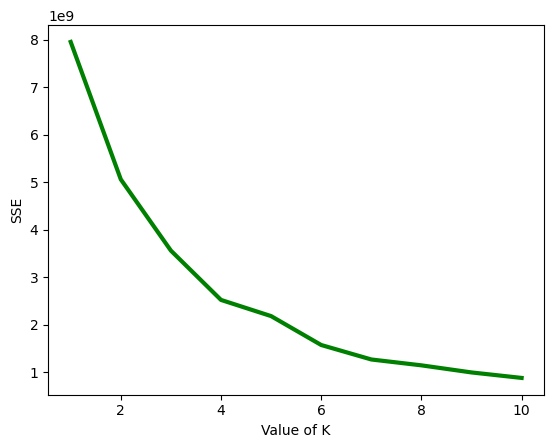

In [17]:
# Then plot the SSE vs k value to see how SSE would change as k increases
plt.plot(range(1, 11), sse, color = 'g', linewidth = '3')
plt.xlabel('Value of K')
plt.ylabel('SSE')

As you can see in the figure above, the elbow points could be considered as the k value of 4. We can also use kneed package to help determine the elbow point.

In [19]:
!pip install kneed
from kneed import KneeLocator


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [20]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [21]:
kl = KneeLocator(
    range(1, 11), sse, curve='convex', direction='decreasing'
)

In [22]:
kl.elbow

4

#### Silhouette Coefficient

In the sklearn implementation of Silhouette Coefficient, the average silhouette coefficient of all the samples are summarized to one score. 

In [24]:
silhouette_coeff = []

for k in range(2, 11):
    KM = KMeans(n_clusters=k, **kmeans_kwargs)
    KM.fit(X_scaled)
    SC_score = silhouette_score(X_scaled, KM.labels_)   # The cluster ID assigned to each point
    silhouette_coeff.append(SC_score)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

KMeans(init='random', n_clusters=7, n_init=10, random_state=42)

KMeans(init='random', n_init=10, random_state=42)

KMeans(init='random', n_clusters=9, n_init=10, random_state=42)

KMeans(init='random', n_clusters=10, n_init=10, random_state=42)

([<matplotlib.axis.XTick at 0x755400fa0310>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

Text(0.5, 0, 'Number of Clusters K')

Text(0, 0.5, 'Silhouette Coefficient')

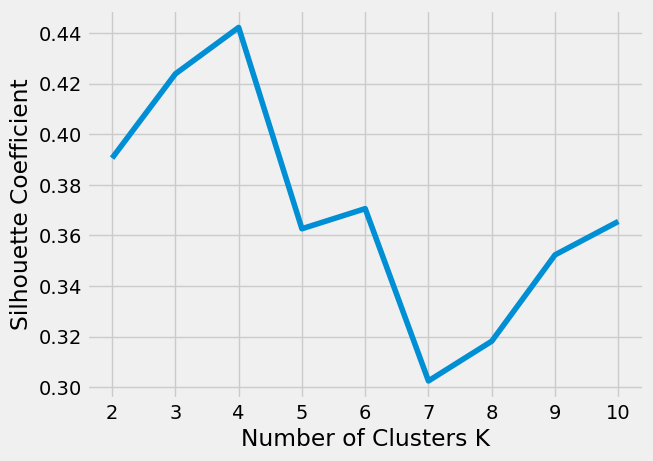

In [25]:
plt.style.use('fivethirtyeight')
plt.plot(range(2, 11), silhouette_coeff)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Coefficient')

According to the figure Silhouette Coeff vs k value, it also indicates that k equals 4 would be a good choice of cluster number.

### Run KMeans model with the Chosen K Value 

In [36]:
k = 4
KM = KMeans(n_clusters=k, **kmeans_kwargs)
KM.fit(X_scaled)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [37]:
print(KM.cluster_centers_)

[[-0.71850598 -0.1481906  -0.11788397]
 [-0.01657477  0.30602371  5.45753108]
 [-0.03383936  3.45263294  0.64790105]
 [ 0.98379347 -0.14113129 -0.11018398]]


In [38]:
labels = KM.labels_
len(labels)

93396

In [39]:
df['cluster_labels'] = labels

In [40]:
df['cluster_labels'].value_counts()

cluster_labels
0    50987
3    37387
2     3590
1     1432
Name: count, dtype: int64

In [31]:
df.head()

customer_unique_id  Recency  Frequency  Monetary  Length  rating  payment_installments  cluster_labels
0  0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90       0     5.0                   8.0               0
1  0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90       0     4.0                   1.0               0
2  0000f46a3911fa3c0805444483337064      541          1     69.00       0     3.0                   8.0               3
3  0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99       0     4.0                   4.0               3
4  0004aac84e0df4da2b147fca70cf8255      292          1    180.00       0     5.0                   6.0               3

### Visualization of Clusters

In [41]:
y = labels
x = df[['Recency', 'Frequency', 'Monetary']].values
x 

array([[115.  ,   1.  , 129.9 ],
       [118.  ,   1.  ,  18.9 ],
       [541.  ,   1.  ,  69.  ],
       ...,
       [572.  ,   1.  ,  89.9 ],
       [123.  ,   1.  , 115.  ],
       [488.  ,   1.  ,  56.99]])

Text(0.5, 0, 'Recency-->')

Text(0.5, 0.5, 'Frequency-->')

Text(0.5, 0, 'Monetary-->')

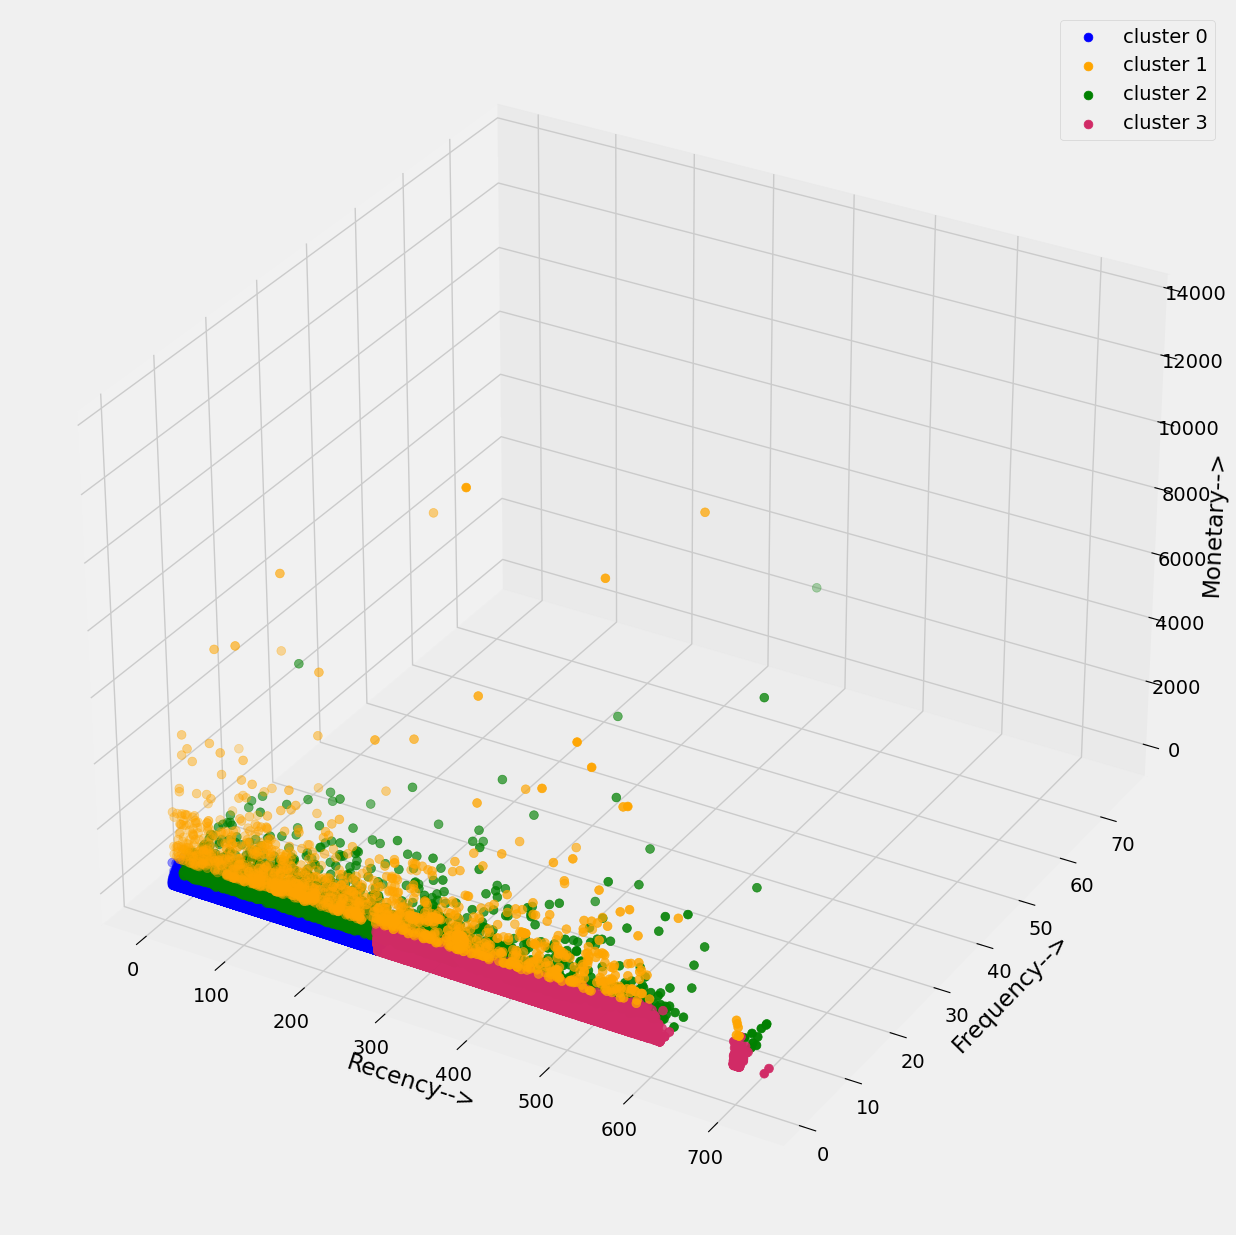

In [42]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y==0, 0], x[y==0, 1], x[y==0, 2], s=40, color='blue', label='cluster 0')
ax.scatter(x[y==1, 0], x[y==1, 1], x[y==1, 2], s=40, color='orange', label='cluster 1')
ax.scatter(x[y==2, 0], x[y==2, 1], x[y==2, 2], s=40, color='green', label='cluster 2')
ax.scatter(x[y==3, 0], x[y==3, 1], x[y==3, 2], s=40, color='#D12B66', label='cluster 3')
ax.set_xlabel('Recency-->')
ax.set_ylabel('Frequency-->')
ax.set_zlabel('Monetary-->')
ax.legend()

In [44]:
!pip install plotly
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 65.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]


In [47]:
Scene = dict(xaxis=dict(title = 'Recency -->'),
            yaxis=dict(title = 'Frequency -->'),
            zaxis=dict(title = 'Monetary -->')
            )
trace = go.Scatter3d(x=x[:, 0],
                    y=x[:, 1],
                    z=x[:, 2], 
                    mode='markers',
                    marker=dict(color=labels, size=2, line=dict(color='black', width=1)))
layout = go.Layout(margin=dict(l=0, r=0), scene = Scene, height=800, width=800)
data = [trace]
fig = go.Figure(data=data, layout=layout)
fig.show()